In [53]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings


warnings.filterwarnings('ignore')

In [ ]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [ ]:
base_dados.head()

In [ ]:
base_dados.shape

In [ ]:
base_dados.isnull().sum()

In [ ]:
base_dados.dropna(inplace=True)

In [ ]:
base_dados.isnull().sum()

In [ ]:
base_dados.describe()

In [ ]:
plt.figure(figsize=(10,5))

plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14)

sns.barplot( data = base_dados, x = 'Year', y = 'Global', ci = None, color='#69b3a2', estimator = sum)

plt.ylabel('Quantidade Vendas (mi)');

In [ ]:
base_dados = base_dados.loc[(base_dados['Year'] !=2019) & (base_dados['Year'] !=2020)]


In [ ]:
plt.figure(figsize=(12,5))

plt.style.use('ggplot')

plt.title('Distribuição das vendas globais', loc='left', fontsize=14)

sns.kdeplot( base_dados['Global'], shade= True, bw=1, color= '#96a8a8', linewidth=2.5);

In [ ]:
Analise = base_dados.groupby( by=['Year']).sum().reset_index()

In [ ]:
plt.figure(figsize=(10,4))

sns.boxplot (data= base_dados, x='Year', y='Global')

No conjunto de dados é possivél notar uma grande presença de outliers, possivelmente alguns jogos se destacaram e tiveram uma quantidade elevada de unidades

In [ ]:
base_dados.loc[base_dados['Global'] >= 10]

In [ ]:
#Analisando (%) de contribuição de cada continente
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]


America, Europa, Japao, Mundo

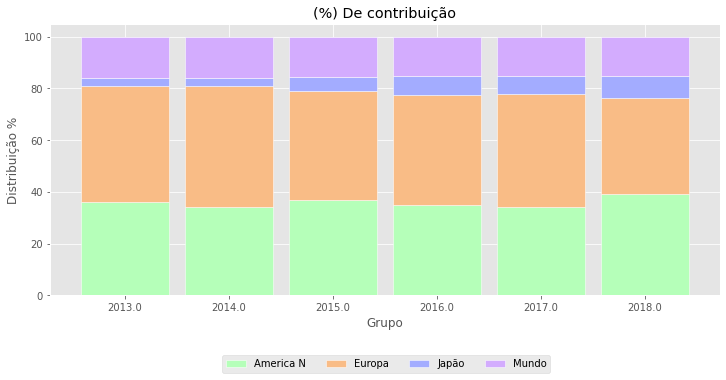

In [51]:
plt.figure(figsize=(12,5))

Largura_barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('(%) De contribuição');

#Plot America
plt.bar(Grupos, America, width= Largura_barra, color = '#b5ffb9', edgecolor ='white')

#Plot Europa
plt.bar(Grupos, Europa, bottom=America, width= Largura_barra, color = '#f9bc86', edgecolor ='white')

#Plot Japao
plt.bar( Grupos, Japao, bottom = [ A + B for A, B in zip(America, Europa) ], width= Largura_barra, color = '#a3acff', edgecolor ='white')

#Plot Mundo
plt.bar( Grupos, Mundo, bottom = [ A + B + C for A, B , C in zip(America, Europa, Japao) ], width= Largura_barra, color = '#d3acfe', edgecolor ='white')

plt.title('(%) De contribuição')

plt.xticks( Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.25, -0.2), ncol=4)

In [56]:
#Gerando um id para cada string e criando uma coluna
funcao_label = LabelEncoder()

funcao_label.fit_transform(base_dados['Publisher'])

array([107,   8, 107,   8,  40,  41, 113, 113,   8,  19,  40,  41,   8,
        41, 112, 112,  40, 113, 113,   8, 112,  86, 117,   8,  25,  23,
        41, 140, 140, 140,   8, 140,   8, 144, 140, 140,   1, 140,  41,
       113, 140,   1, 145,  40,  19, 140,   1,  25,  40,  40, 145, 140,
       140, 112,  70, 112, 112,  19,   0,  23, 140,  41,  40,   1, 144,
        86, 113, 112, 113,  41,  61,  40,  41,   8,  41, 113,  41, 117,
       112,  19, 145, 117,   3, 117,  19, 145, 112, 112,  19, 140, 117,
       140,  41, 145, 117,  86,  35, 112,  19, 113,  86,   1, 117,  86,
       140,  41,  86, 140,  41,  25,  19,   1, 145,  40, 113, 122,   0,
        18,   0,   8,  70, 145, 113, 117,  86, 145, 145,   1, 113, 145,
        19, 145,  41, 117, 108, 113,  19,  19, 117, 129, 112, 140, 145,
         0, 145,  40,  40, 112, 145, 117,  86, 112,  55, 145,  84,   0,
       117, 113,  37,  45, 140,  70, 119, 117, 140, 117,   8,  27, 117,
        70, 145,  70,  37,  70,   3, 112, 113, 117, 145,  25,  8

In [59]:
base_dados['Publisher_id'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genre_id'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Game_id'] = funcao_label.fit_transform(base_dados['Game'])

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Publisher_id,Genre_id,Game_id
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [62]:
#Definindo paleta de cores 
Paleta_Cores = sns.color_palette('husl',8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

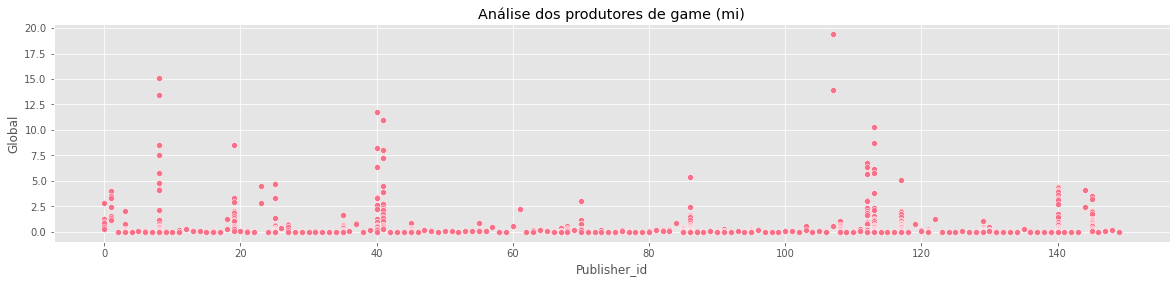

In [73]:
plt.figure(figsize=(20,4))

plt.title('Análise dos produtores de game (mi)')

sns.scatterplot(data=base_dados, x='Publisher_id' ,y='Global', color=Paleta_Cores[0]);


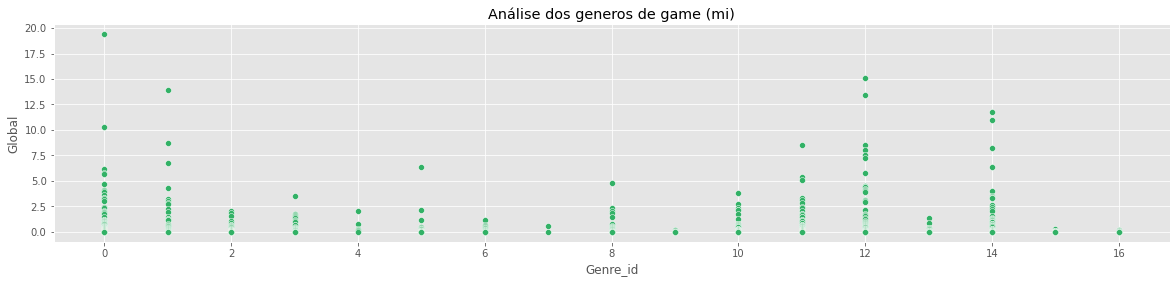

In [74]:
plt.figure(figsize=(20,4))

plt.title('Análise dos generos de game (mi)')

sns.scatterplot(data=base_dados, x='Genre_id' ,y='Global', color=Paleta_Cores[3]);


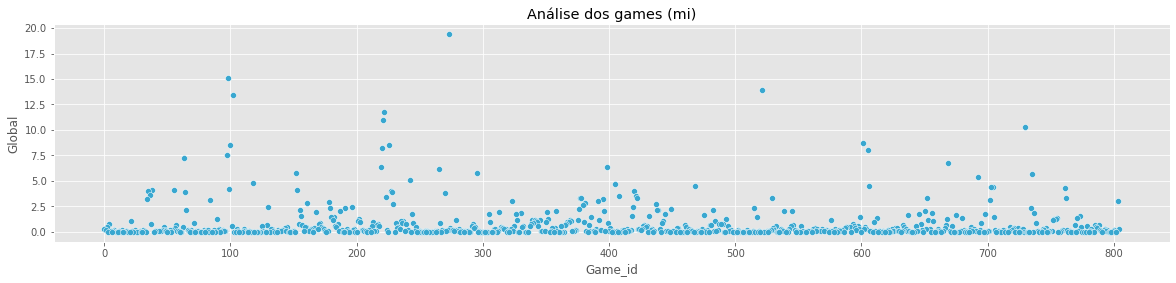

In [75]:
plt.figure(figsize=(20,4))

plt.title('Análise dos games (mi)')

sns.scatterplot(data=base_dados, x='Game_id' ,y='Global', color=Paleta_Cores[5]);
